In [66]:
# importing the Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')    # To suppress all the warnings in the notebook.
pd.set_option('mode.chained_assignment', None) # To suppress pandas warnings.
np.set_printoptions(precision=4) # To display values only upto four decimal places.


messages=pd.read_csv(r"C://Users/Pro/Downloads/spam.csv", encoding='latin-1',
                     sep=',')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [2]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
print(messages['label'].unique())
label= messages['label'].value_counts()
label

['ham' 'spam']


ham     4825
spam     747
Name: label, dtype: int64

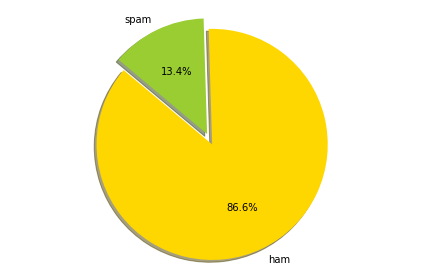

In [57]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise
labels = ['ham', 'spam']  #ham 4825,  spam     747
sizes = [4825, 747]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.tight_layout()
plt.show()

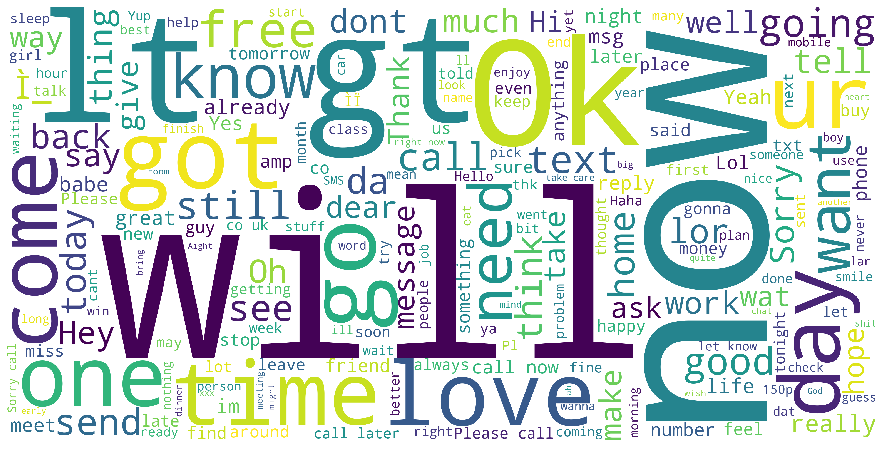

In [59]:
title_corpus = ' '.join(messages['message'])
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [3]:
#Data cleaning and preprocessing libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [41]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(messages['label'])
y=y.iloc[:,1]


In [42]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [43]:
# Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred=spam_detect_model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
print('spam detect test set roc-auc:', metrics.roc_auc_score(y_test, y_pred))

spam detect test set roc-auc: 0.9697303439257557


In [45]:
print('classification_report :- ')
print(classification_report(y_test, y_pred))

classification_report :- 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.96      0.95      0.95       166

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Text(91.68, 0.5, 'Actual')

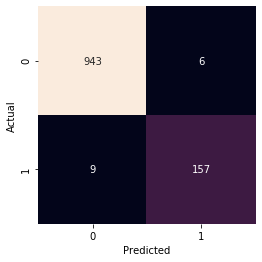

In [46]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
#print('confusion_matrix',mat)
names = np.unique(y_pred)
#Heat map works by correlation. This shows you which variables are correlated to each other 
#from a scale of 1 being the most correlated and -1 is not correlated at all
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [47]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9865470852017937


Classification accuracy: percentage of correct predictions

In [48]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred[0:25])

True: [0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1]
Pred: [0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1]


In [49]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    949
1    166
Name: spam, dtype: int64


accuracy that could be achieved by always predicting the most frequent class


AUC: 0.9697303439257557


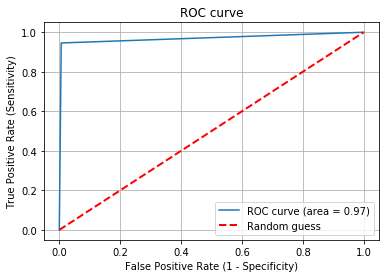

In [50]:
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print("AUC:", auc)

plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid()
plt.legend()
plt.show()

In [51]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(spam_detect_model, X, y, cv=10, scoring='roc_auc').mean()

0.9852532412054332

In [27]:
#from nltk.stem import WordNetLemmatizer # did not get good accuracy with lemmatizer so tried with stemmer
#lemmatizer = WordNetLemmatizer()  # meaningful words are o/p but takes more time compared to stemming has no meaning
# lemmatizer spam detect test set roc-auc: 0.9686766031459876
#   stemming spam detect test set roc-auc: 0.9697303439257557

ham: 4825
spam: 747
Proportion: 6.46 : 1


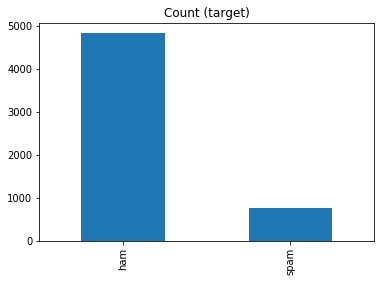

In [64]:
# checking the balance of target variable
target_count = messages.label.value_counts()  ##ham 4825,  spam     747
print('ham:', target_count[0])
print('spam:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

* we can achieve better results with more balanced data